In [56]:
import librosa as lb
import librosa.display
import librosa.feature
import librosa.util
import librosa.effects

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import wave 
import soundfile as sf
import pyaudio


In [57]:
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\kick\kick_samples\kick_0001.wav"
file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\hat\hat_samples\hat_0008.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\snare\snare_samples\snare_0001.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\clap\clap_samples\clap_0001.wav"
# file_path = r"C:\Users\llama\Desktop\programming shit\Bakalarka\Bakalaris-data\drums-one_shots\snare\snare_samples\snare_0120.wav"




In [58]:
def play_wave(wave, wave_info):
    # initialize PyAudio
    p = pyaudio.PyAudio()

    # open a stream
    stream = p.open(format=pyaudio.paFloat32,
                    channels=wave_info.channels,
                    rate=wave_info.samplerate,
                    output=True)

    # play audio
    stream.write(wave.tobytes())

    # stop stream and terminate PyAudio
    stream.stop_stream()
    stream.close()
    p.terminate()

In [107]:
wave_info = sf.info(file_path)
print(type(wave_info))
print(f"Channels: {wave_info.channels}")
print(f"Sample rate: {wave_info.samplerate} Hz")
print(f"Duration: {wave_info.duration} seconds")

<class 'soundfile._SoundFileInfo'>
Channels: 2
Sample rate: 44100 Hz
Duration: 4.0607482993197275 seconds


In [60]:
lb_wave, _ = lb.load(file_path, sr=wave_info.samplerate)

In [61]:
duration = lb.get_duration(y=lb_wave, sr=wave_info.samplerate)
print(f"Librosa duration: {duration} seconds")

Librosa duration: 4.0607482993197275 seconds


### MFCC

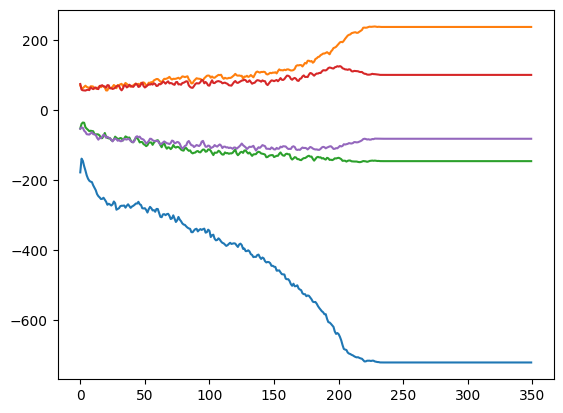

In [62]:
mfcc_features = lb.feature.mfcc(y=lb_wave, sr=wave_info.samplerate, n_mfcc=256, n_fft=2048, hop_length=512, lifter=0, dct_type=3, n_mels = 128)
# lb.display.specshow(mfcc_features, sr=wave_info.samplerate)

plt.plot(mfcc_features[0,:])
plt.plot(mfcc_features[1,:])
plt.plot(mfcc_features[2,:])
plt.plot(mfcc_features[3,:])
plt.plot(mfcc_features[4,:])
plt.show()

In [63]:
#from mfcc features to audio
wave_from_mfcc = lb.feature.inverse.mfcc_to_audio(mfcc_features, sr= wave_info.samplerate, n_mels=128, n_fft=2048, hop_length=512, lifter=0, dct_type=3)


In [64]:
play_wave(lb_wave, wave_info)

In [65]:
play_wave(wave_from_mfcc, wave_info)

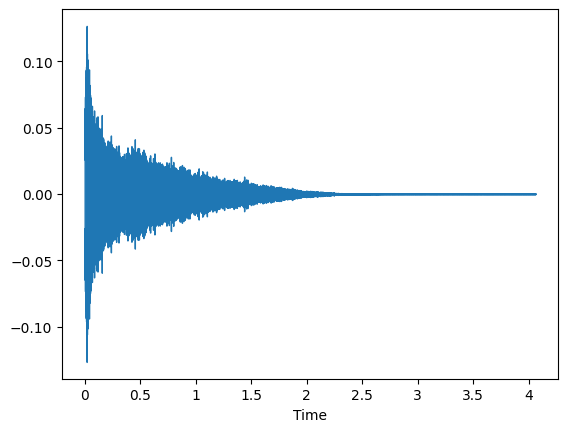

In [66]:
lb.display.waveshow(lb_wave, sr=wave_info.samplerate)


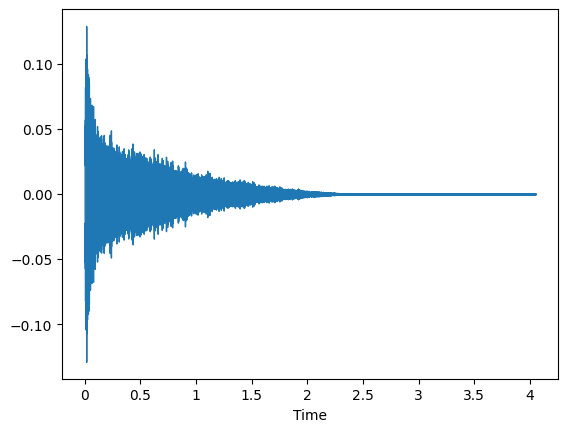

In [67]:
lb.display.waveshow(wave_from_mfcc, sr=wave_info.samplerate)

KeyboardInterrupt: 

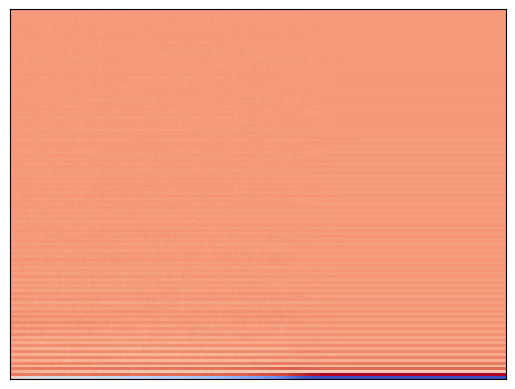

In [104]:
variance = 1.5
# noise = np.random.normal(0, variance, mfcc_features.shape)
noise = np.outer(np.random.normal(0, variance, mfcc_features.shape[0]), np.ones((1, mfcc_features.shape[1]))).astype(np.float32)
# mfcc_features_noised = mfcc_features + noise
mfcc_features_noised = mfcc_features * (1 + noise)
# lb.display.specshow(mfcc_features_noised, sr=wave_info.samplerate)
lb.display.specshow(mfcc_features, sr=wave_info.samplerate)


noised_wave_from_mfcc = lb.feature.inverse.mfcc_to_audio(mfcc_features_noised, sr= wave_info.samplerate, n_mels=128, n_fft=2048, hop_length=512, lifter=0, dct_type=3)

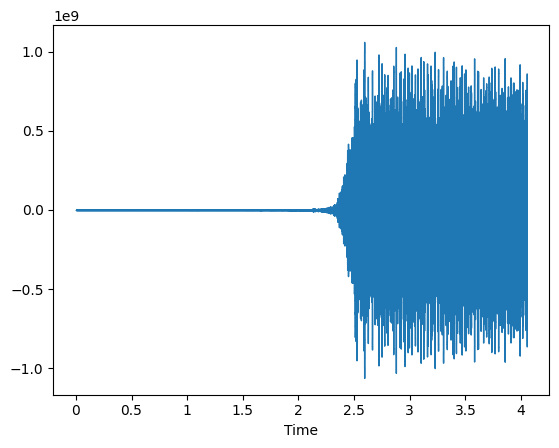

In [102]:
lb.display.waveshow(noised_wave_from_mfcc, sr=wave_info.samplerate)


In [103]:
play_wave(noised_wave_from_mfcc, wave_info)

### MEL-spectogram

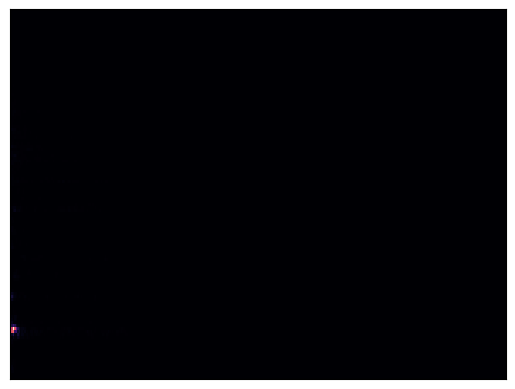

In [ ]:
mel_features = lb.feature.melspectrogram(y=lb_wave, 
                                         sr=wave_info.samplerate, 
                                         n_fft=2048, 
                                         n_mels=128, 
                                         hop_length=512, 
                                         power = 2, 
                                         htk=True, 
                                        #  fmax=1024
                                         )

lb.display.specshow(mel_features, sr=wave_info.samplerate)

In [ ]:
wave_from_mel = lb.feature.inverse.mel_to_audio(mel_features,
                                                sr=wave_info.samplerate,
                                                n_fft=2048,
                                                hop_length=512, 
                                                power = 2, 
                                                htk=True, 
                                                # fmax=1024,
                                                )

In [ ]:
play_wave(lb_wave, wave_info)

In [ ]:
play_wave(wave_from_mel, wave_info)

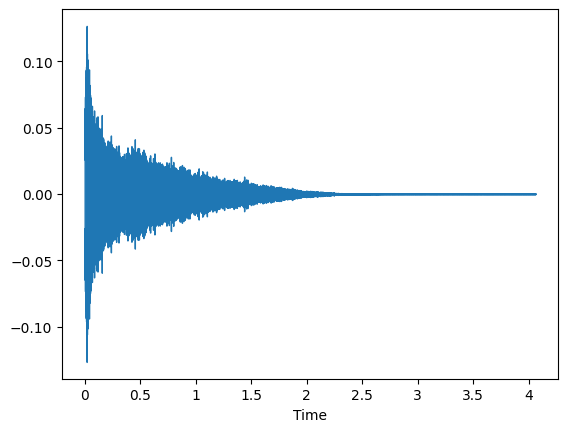

In [ ]:
librosa.display.waveshow(lb_wave, sr=wave_info.samplerate)

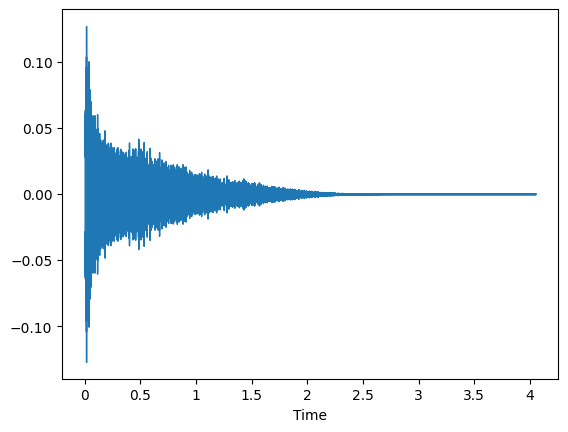

In [ ]:
librosa.display.waveshow(wave_from_mel, sr=wave_info.samplerate)

### STFT

C:\Users\llama\AppData\Local\Temp\ipykernel_8080\2450782027.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lb.display.specshow(np.log(stft_features+1), sr=wave_info.samplerate)


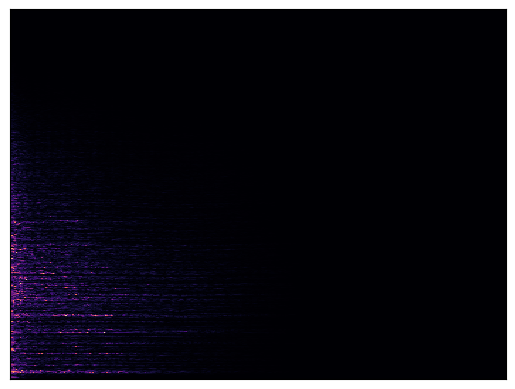

In [ ]:
stft_features = lb.stft(y=lb_wave, n_fft=2048, hop_length=512)
# stft_features[25:, :] = 0
# lb.display.specshow(stft_features, sr=wave_info.samplerate)
lb.display.specshow(np.log(stft_features+1), sr=wave_info.samplerate)


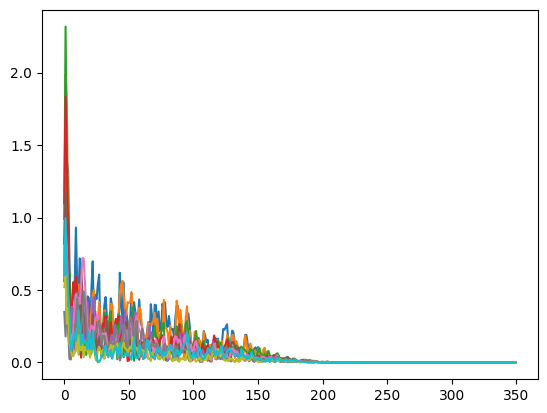

In [ ]:
for i in range(100,110):
    plt.plot(list(map(lambda x : abs(x), stft_features[i,:])))

plt.show()

In [ ]:
#divide phase and magnitude out of stft_features
stft_magnitude, stft_phase = lb.magphase(stft_features)

C:\Users\llama\AppData\Local\Temp\ipykernel_8080\838998318.py:7: RuntimeWarning: invalid value encountered in log
  lb.display.specshow(np.log(stft_magnitude_noised), sr=wave_info.samplerate)


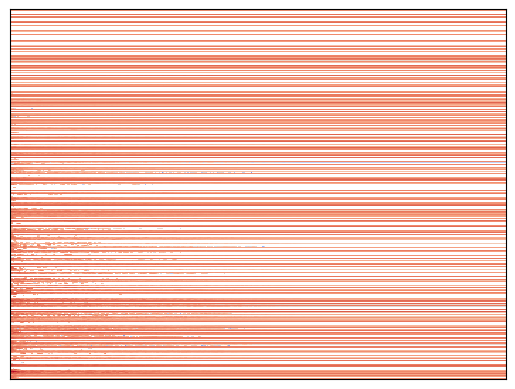

In [ ]:
variance = 1
noise = np.outer(np.random.normal(0, variance, stft_magnitude.shape[0]), np.ones((1, stft_magnitude.shape[1]), dtype= np.float32)).astype(np.float32)
stft_magnitude_noised = stft_magnitude * (1 + noise)
stft_magnitude_noised = stft_magnitude + noise

stft_features_noised = stft_magnitude_noised * stft_phase
lb.display.specshow(np.log(stft_magnitude_noised), sr=wave_info.samplerate)

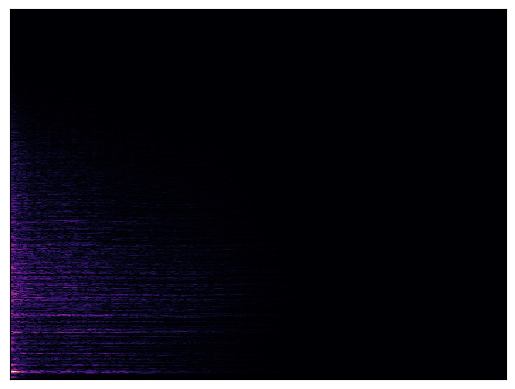

In [ ]:
lb.display.specshow(np.log(stft_magnitude+1), sr=wave_info.samplerate)


In [ ]:
stft_noised_wave = lb.istft(stft_features_noised, hop_length=512)

In [ ]:
play_wave(stft_noised_wave, wave_info)

In [ ]:
wave_from_stft = lb.istft(stft_features, hop_length=512)

In [ ]:
play_wave(lb_wave, wave_info)

In [ ]:
play_wave(wave_from_stft, wave_info)

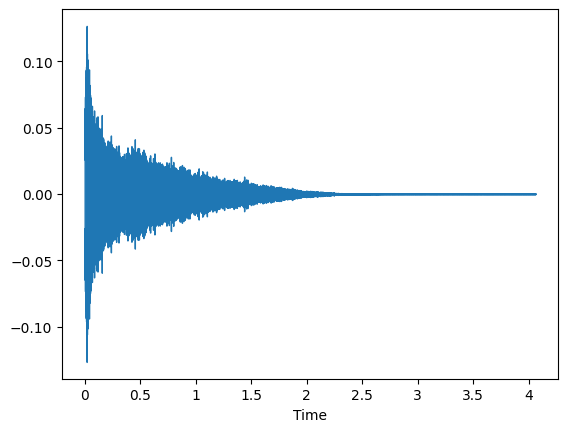

In [ ]:
lb.display.waveshow(lb_wave, sr=wave_info.samplerate)

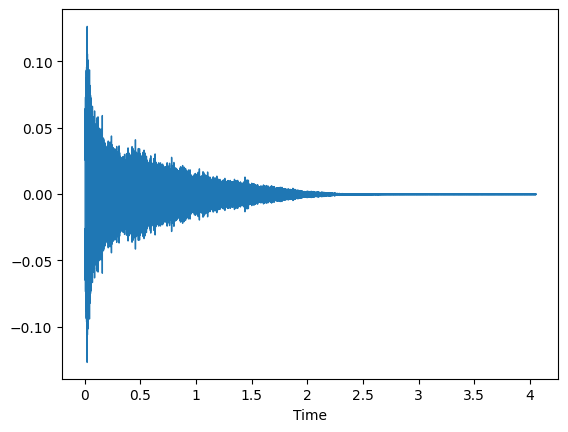

In [ ]:
lb.display.waveshow(wave_from_stft, sr=wave_info.samplerate)